In [9]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


In [510]:
file_name = r"E:\dm_data\20241217_6e-8mbar_0e_alignment3_long/20241217_d_690.hdf5"
f = h5py.File(file_name, 'r')

# print(np.mean(f['data']['channel_a'] * f['data']['channel_a'].attrs['adc2mv']))
# print(np.mean(f['data']['channel_b'] * f['data']['channel_b'].attrs['adc2mv']))
# print(np.mean(f['data']['channel_c'] * f['data']['channel_c'].attrs['adc2mv']))

print(f['data'].attrs['channel_a_mean_mv'])
print(f['data'].attrs['channel_b_mean_mv'])
print(f['data'].attrs['channel_c_mean_mv'])
print(f['data'].attrs['channel_e_mean_mv'])
print(np.std(f['data']['channel_d'] * f['data']['channel_d'].attrs['adc2mv']))

print(f['data'].attrs['pressure_mbar'])
f.close()


8945.110041322061
9219.936637134922
2985.6861398256374
26.714852996408986
104.94367698604742
4.5e-08


In [96]:

# del aa, bb, cc, dd, ee, ff, gg

In [11]:
file_name = r"E:\pulse_waveform\20241125_quantum_composers\20241125_200ns_20v_0.hdf5"
f = h5py.File(file_name, 'r')

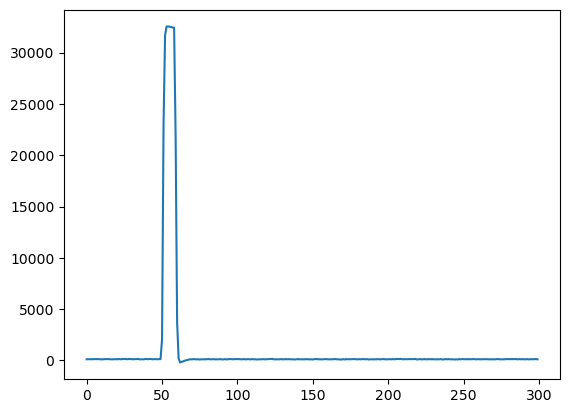

In [12]:
plt.plot(f['data']['channel_g_99'][:])

In [13]:
f.close()

In [ ]:
3e-5 / np.sqrt(10e-6) / 2000 / 500e-3 # V

6.708203932499369e-06

In [22]:
timestamp = f['data'].attrs['timestamp']
dt = f['data'].attrs['delta_t']
fs = int(np.ceil(1 / dt))

# aa = f['data']['channel_a'] * f['data']['channel_a'].attrs['adc2mv']
# bb = f['data']['channel_b'] * f['data']['channel_b'].attrs['adc2mv']
# cc = f['data']['channel_c'] * f['data']['channel_c'].attrs['adc2mv']
dd = f['data']['channel_d'] * f['data']['channel_d'].attrs['adc2mv']
# ee = f['data']['channel_e'] * f['data']['channel_e'].attrs['adc2mv']
# ff = f['data']['channel_f'] * f['data']['channel_f'].attrs['adc2mv']
gg = f['data']['channel_g'] * f['data']['channel_g'].attrs['adc2mv']
# zz_bp = bandpass_filtered(dd, fs, 30000, 100000)


Text(0.5, 0, 'Idx')

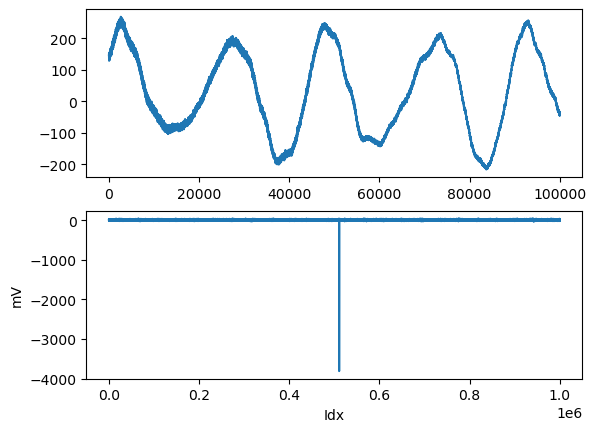

In [23]:
fig, axes = plt.subplots(2, 1)

# axes[0].plot(aa)
# axes[0].plot(bb)
# axes[0].plot(cc)
axes[0].plot(dd[:100000])

# axes[1].plot(ee)
# axes[1].plot(ff)
axes[1].plot(gg[:1000000])

plt.ylabel('mV')
plt.xlabel('Idx')

In [24]:
del dd, gg